## Homework 8
### Урок 8. Дисперсионный анализ. Логистическая регрессия

**1. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.**

По условию задачи исследуем влияние одного фактора (вид спорта) на количественный показатель (рост спортсмена), при этом даны наблюдения по трем уровням (футболисты, хоккеисты, штангисты). Определим существуют ли различия между группами:

In [4]:
# вычислим вручную
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
y_fb = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y_hck = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
y_wl = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

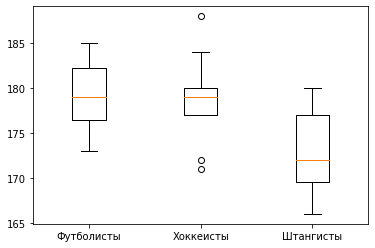

In [8]:
plt.boxplot([y_fb, y_hck, y_wl], labels = ['Футболисты', 'Хоккеисты', 'Штангисты'])
plt.show()

Заметно, что рост штангистов отличается от роста хоккеистов и футболистов. За исключеним некоторых выбросов, рост футболистов и хоккеистов в целом схож (медиана тоже практически одинакова). 

In [13]:
# найдем средние по группам и среднее по всем значениям
y_fb_mean = y_fb.mean()
y_hck_mean = y_hck.mean()
y_wl_mean = y_wl.mean()
Y_mean = np.concatenate([y_fb, y_hck, y_wl]).mean()
print(f'Средний рост: футболистов - {y_fb_mean}, хоккеистов - {y_hck_mean}, штангистов - {y_wl_mean}, общий - {Y_mean}')

Средний рост: футболистов - 179.125, хоккеистов - 178.66666666666666, штангистов - 172.72727272727272, общий - 176.46428571428572


In [20]:
# найдем сумму квадратов отклонений наблюдений от общего среднего
def square_sum(x, mean, n = []):
    sum = 0
    for idx, el in enumerate(x):
        if n == []:
            sum += (el - mean)**2
        else:
            sum += (el - mean)**2 * n[idx]
    return sum

S = square_sum(np.concatenate([y_fb, y_hck, y_wl]), Y_mean)
S

830.9642857142854

In [21]:
# найдем сумму квадратов отклонений средних групповых значений от общего среднего значения
S_fact = square_sum([y_fb_mean, y_hck_mean, y_wl_mean], Y_mean, [len(y_fb), len(y_hck), len(y_wl)])
S_fact

253.9074675324678

In [22]:
# найдем остаточную сумму квадратов отклонений
S_res = square_sum(y_fb, y_fb_mean) + square_sum(y_hck, y_hck_mean) + square_sum(y_wl, y_wl_mean)
S_res

577.0568181818181

In [23]:
# вычисляем факторную дисперсию
sigma_fact = S_fact / (3 - 1)
sigma_fact

126.9537337662339

In [24]:
# вычисляем остаточную дисперсию
sigma_res = S_res / (len(y_fb) + len(y_hck) + len(y_wl) - 3)
sigma_res

23.082272727272724

In [26]:
# вычислим F расчетное:
F_H = sigma_fact / sigma_res
F_H

5.500053450812599

Табличное значение Fкрит для уровня значимости 0.05 и 2 степеней свободы составит 3.38, для уровня значимости 0.01 - 5.56. 

Таким образом, для уровня значимости 0.05 получаем, что различия между ростом спортсменов для различных видов спорта статистически значимы, для уровня значимости 0.01 различия неоднозначны.

In [28]:
# проверим готовым методом
stats.f_oneway(y_fb, y_hck, y_wl)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Для уровня значимости $\alpha = 0.05$ получаем, что различия между ростом спортсменов для различных видов спорта статистически значимы. 

Для уровня значимости $\alpha = 0.01$, скорее всего, потребовались бы дополнительные измерения. 